# Leave one out Outlier detection

In [2]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import lmfit

plt.rcParams['figure.dpi'] = 130
plt.rcParams['figure.autolayout'] = True

### Generate data and fit model

In [5]:
np.random.seed(1)
x = np.linspace(0.3, 10, 100)
y = 1.0 / (0.1 * x) + 2.0 + 3 * np.random.randn(x.size)

params = lmfit.Parameters()
params.add_many(('a', 0.1), ('b', 1))


def func(x, a, b):
    return 1.0 / (a * x) + b


# Make 5 points outliers
idx = np.random.randint(0, x.size, 5)
y[idx] += 10 * np.random.randn(idx.size)

# Fit a linear model
model = lmfit.Model(func, independent_vars=['x'])
fit_result = model.fit(y, x=x, a=0.1, b=2)

### Show results

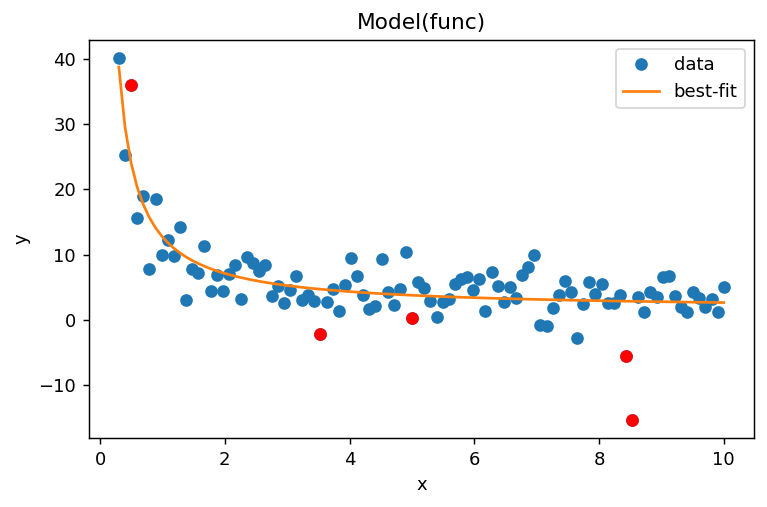

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 12
    # data points      = 100
    # variables        = 2
    chi-square         = 1338.34458
    reduced chi-square = 13.6565773
    Akaike info crit   = 263.401856
    Bayesian info crit = 268.612196
[[Variables]]
    a:  0.08937623 +/- 0.00590168 (6.60%) (init = 0.1)
    b:  1.51298992 +/- 0.46229147 (30.55%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) =  0.601


In [6]:
fit_result.plot_fit()
plt.plot(x[idx], y[idx], 'o', color='r', label='outliers')
plt.show()
print(fit_result.fit_report())

### Leave one datapoint at a time

In [7]:
best_vals = defaultdict(lambda: np.zeros(x.size))
stderrs = defaultdict(lambda: np.zeros(x.size))
chi_sq = np.zeros_like(x)
for i in range(x.size):
    idx2 = np.arange(0, x.size)
    idx2 = np.delete(idx2, i)
    tmp_x = x[idx2]
    tmp = model.fit(y[idx2],
                    x=tmp_x,
                    a=fit_result.params['a'],
                    b=fit_result.params['b'])
    chi_sq[i] = tmp.chisqr
    for p in tmp.params:
        tpar = tmp.params[p]
        best_vals[p][i] = tpar.value
        stderrs[p][i] = (tpar.stderr / fit_result.params[p].stderr)

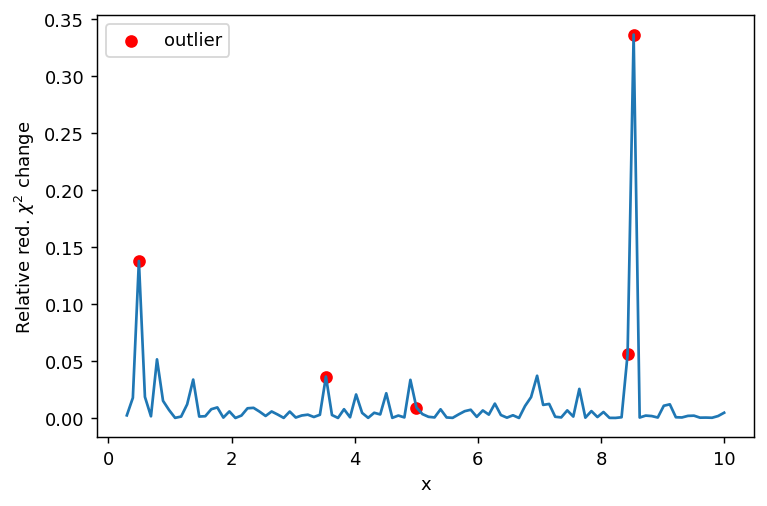

In [9]:
fig, ax = plt.subplots()
ax.plot(x, (fit_result.chisqr - chi_sq) / chi_sq)
ax.scatter(x[idx],
           fit_result.chisqr / chi_sq[idx] - 1,
           color='r',
           label='outlier')
ax.set_ylabel(r'Relative red. $\chi^2$ change')
ax.set_xlabel('x')
ax.legend();

### Influence and error

Text(0.5, 0, 'x')

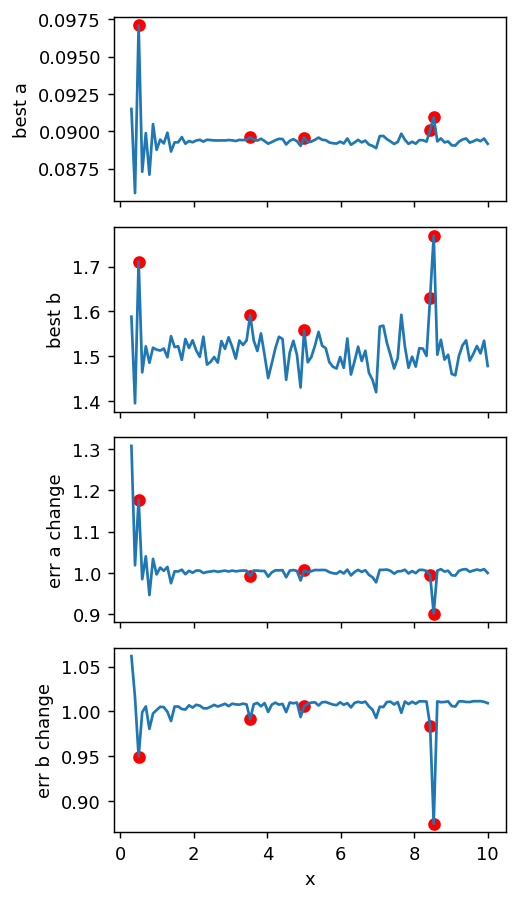

In [10]:
fig, axs = plt.subplots(4, figsize=(4, 7), sharex='col')
axs[0].plot(x, best_vals['a'])
axs[0].scatter(x[idx], best_vals['a'][idx], color='r', label='outlier')
axs[0].set_ylabel('best a')

axs[1].plot(x, best_vals['b'])
axs[1].scatter(x[idx], best_vals['b'][idx], color='r', label='outlier')
axs[1].set_ylabel('best b')

axs[2].plot(x, stderrs['a'])
axs[2].scatter(x[idx], stderrs['a'][idx], color='r', label='outlier')
axs[2].set_ylabel('err a change')

axs[3].plot(x, stderrs['b'])
axs[3].scatter(x[idx], stderrs['b'][idx], color='r', label='outlier')
axs[3].set_ylabel('err b change')

axs[3].set_xlabel('x')

### Credits & Links

https://cars9.uchicago.edu/software/python/lmfit/examples/example_detect_outliers.html